# *ANALISI DEI TASSI DI OCCUPAZIONE - DISOCCUPAZIONE E SCOLARITA' GIOVANILE IN ITALIA NEGLI ANNI 2010 - 2019*

### Esercizio laboratorio per i punti aggiuntivi all'esame di Alice Ilacqua, Laura Sorrentino e Colombo Rebecca

Il dataset  fa riferimento al tasso di occupazione giovanile italiana negli anni 2010 - 2019 raggruppata per età 15-24 e 25-34 anni ; abbiamo deciso di analizzare tale datasat in quanto ci ha interessato l'argomento e abbiamo deciso di approfondirlo utilizzando le competenze acquisite durante le lezioni e durante i vari esercizi svolti

Il dataset utilizzato si può trovare sul sito ISTAT cliccando il seguente link: http://dati-giovani.istat.it/ PERCORSO DA SEGUIRE PER VISUALIZZARE TABELLA: Lavoro--Occupazione--Tasso di occupazione--Popolazione di 15-34 anni - reg.-- selezionare periodo 2010 - 2019 togliendo i trimestri --selezionare fasce età 15-24 e 25-34)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
img = mpimg.imread('C:/Users/utente/Desktop/UNIMI/regioni.jpeg')

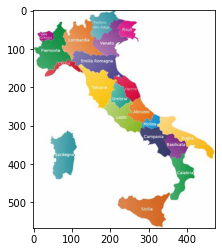

In [3]:
imgplot = plt.imshow(img)

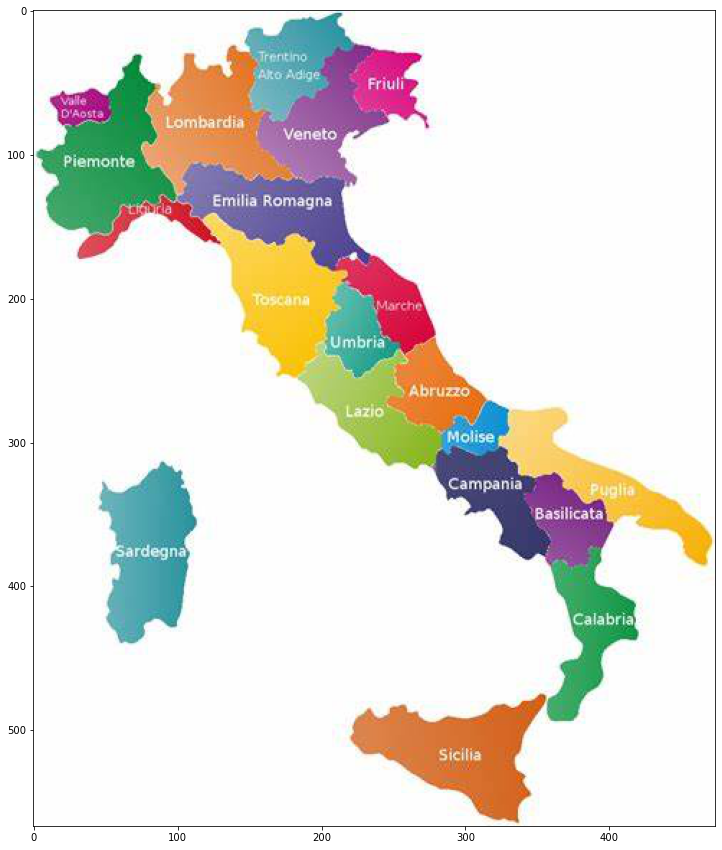

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(img); plt.show()

In [5]:
import numpy as np
import pandas as pd

In [6]:
tabella_iniziale_occ= pd.read_csv("C:/Users/utente/Desktop/UNIMI/tasso occupazione.csv")
tabella_iniziale_occ

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2010,2010,26.830675,NaN,NaN
1,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2011,2011,27.706425,NaN,NaN
2,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2012,2012,26.633891,NaN,NaN
3,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2013,2013,21.571089,NaN,NaN
4,ITC1,Piemonte,EMP_R,tasso di occupazione,1,maschi,Y15-24,15-24 anni,2014,2014,20.204679,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2015,2015,8.627377,NaN,NaN
1316,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2016,2016,10.193790,NaN,NaN
1317,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2017,2017,10.633209,NaN,NaN
1318,ITF4,Puglia,EMP_R,tasso di occupazione,2,femmine,Y15-24,15-24 anni,2018,2018,11.432762,NaN,NaN


In [7]:
tabella_iniziale_occ.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1320
Flags                1320
dtype: int64

**Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**

In [8]:
tasso_occupazione_giovanile= pd.DataFrame(data=tabella_iniziale_occ, columns =['Territorio', 'SEXISTAT1', 'Sesso', 'Classe di età', 'Seleziona periodo', 'Value' ])
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Value
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


**La tabella non ci evidenzia la fascia di età 25-34 ma in realtà i valori ci sono (vedi sotto):**

In [9]:
Età=tasso_occupazione_giovanile.groupby(["Classe di età"]).count().reset_index()
Età["Classe di età"]

0    15-24 anni
1    25-34 anni
Name: Classe di età, dtype: object

In [10]:
#rinominiamo alcuni nomi di colonne per facilitarci
tasso_occupazione_giovanile.rename(columns={"Value": "Valori", "Seleziona periodo":"Anni", "Classe di età":"Età"},inplace=True) 
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


Il primo passaggio da fare è verificare se nel dataset sono presenti tutte le regioni utilizzando la funzione "groupby"

In [11]:
Territori=tasso_occupazione_giovanile.groupby(["Territorio"]).count().reset_index()
Territori["Territorio"]

0                                Abruzzo
1                             Basilicata
2                               Calabria
3                               Campania
4                         Emilia-Romagna
5                  Friuli-Venezia Giulia
6                                  Lazio
7                                Liguria
8                              Lombardia
9                                 Marche
10                                Molise
11                              Piemonte
12    Provincia Autonoma Bolzano / Bozen
13             Provincia Autonoma Trento
14                                Puglia
15                              Sardegna
16                               Sicilia
17                               Toscana
18        Trentino Alto Adige / Südtirol
19                                Umbria
20        Valle d'Aosta / Vallée d'Aoste
21                                Veneto
Name: Territorio, dtype: object

Come si può notare, le due Province di Bolzano e Trento rientrano nella regione del Trentino Alto Adige quindi le cancelliamo dal dataset:

In [12]:
#TOG="tasso occupazione giovanile"
TOG_regioni=tasso_occupazione_giovanile[~tasso_occupazione_giovanile.Territorio.str.contains("Provincia")]
TOG_regioni

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


**Il nostro dataset adesso è TOG_regioni quindi poi possiamo creare altri dataset partendo da questo**

In [13]:
primo_data=TOG_regioni[['Territorio', 'Sesso', 'Valori', 'Età']]
primo_data

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,26.830675,15-24 anni
1,Piemonte,maschi,27.706425,15-24 anni
2,Piemonte,maschi,26.633891,15-24 anni
3,Piemonte,maschi,21.571089,15-24 anni
4,Piemonte,maschi,20.204679,15-24 anni
...,...,...,...,...
1315,Puglia,femmine,8.627377,15-24 anni
1316,Puglia,femmine,10.193790,15-24 anni
1317,Puglia,femmine,10.633209,15-24 anni
1318,Puglia,femmine,11.432762,15-24 anni


In [14]:
sesso_femmine=primo_data[primo_data.Sesso == "femmine"] 
sesso_femmine

,Territorio,Sesso,Valori,Età
10,Piemonte,femmine,21.691149,15-24 anni
11,Piemonte,femmine,21.090656,15-24 anni
12,Piemonte,femmine,19.578197,15-24 anni
13,Piemonte,femmine,15.452046,15-24 anni
14,Piemonte,femmine,16.106807,15-24 anni
...,...,...,...,...
1315,Puglia,femmine,8.627377,15-24 anni
1316,Puglia,femmine,10.193790,15-24 anni
1317,Puglia,femmine,10.633209,15-24 anni
1318,Puglia,femmine,11.432762,15-24 anni


In [15]:
sesso_maschi=primo_data[primo_data.Sesso == "maschi"] 
sesso_maschi

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,26.830675,15-24 anni
1,Piemonte,maschi,27.706425,15-24 anni
2,Piemonte,maschi,26.633891,15-24 anni
3,Piemonte,maschi,21.571089,15-24 anni
4,Piemonte,maschi,20.204679,15-24 anni
...,...,...,...,...
1265,Campania,maschi,12.978117,15-24 anni
1266,Campania,maschi,14.594548,15-24 anni
1267,Campania,maschi,14.120601,15-24 anni
1268,Campania,maschi,13.194163,15-24 anni


In [16]:
totale=primo_data[primo_data.Sesso == "totale"]
totale

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,24.321255,15-24 anni
21,Piemonte,totale,24.479800,15-24 anni
22,Piemonte,totale,23.196776,15-24 anni
23,Piemonte,totale,18.593086,15-24 anni
24,Piemonte,totale,18.210225,15-24 anni
...,...,...,...,...
1275,Sicilia,totale,39.700859,25-34 anni
1276,Sicilia,totale,40.051565,25-34 anni
1277,Sicilia,totale,39.675758,25-34 anni
1278,Sicilia,totale,38.756915,25-34 anni


In [17]:
provapdef=totale.groupby(["Territorio", "Età"]).sum()
provapdef

Valori
Territorio                     Età                   
Abruzzo                        15-24 anni  158.337756
                               25-34 anni  603.807763
Basilicata                     15-24 anni  122.045340
                               25-34 anni  488.143381
Calabria                       15-24 anni  104.053241
                               25-34 anni  402.382948
Campania                       15-24 anni  111.460818
                               25-34 anni  401.488959
Emilia-Romagna                 15-24 anni  228.384688
                               25-34 anni  748.778111
Friuli-Venezia Giulia          15-24 anni  209.704730
                               25-34 anni  721.255197
Lazio                          15-24 anni  153.519892
                               25-34 anni  637.620277
Liguria                        15-24 anni  174.004983
                               25-34 anni  685.378427
Lombardia                      15-24 anni  224.369700
                               25-34 anni  770.966216
Marche                         15-24 anni  201.705914
                               25-34 anni  702.423494
Molise                         15-24 anni  128.373087
                               25-34 anni  509.925472
Piemonte                       15-24 anni  206.384744
                               25-34 anni  727.672955
Puglia                         15-24 anni  137.524763
                               25-34 anni  480.146439
Sardegna                       15-24 anni  142.989974
                               25-34 anni  515.905258
Sicilia                        15-24 anni  112.695829
                               25-34 anni  406.522783
Toscana                        15-24 anni  204.449984
                               25-34 anni  708.184249
Trentino Alto Adige / Südtirol 15-24 anni  303.863696
                               25-34 anni  785.724684
Umbria                         15-24 anni  194.163029
                               25-34 anni  689.701016
Valle d'Aosta / Vallée d'Aoste 15-24 anni  231.193863
                               25-34 anni  761.162014
Veneto                         15-24 anni  239.599557
                               25-34 anni  750.727922

Sulla base del dataset provapdef contenente solo i valori totali non suddivisi tra "maschi" e "femmine" andiamo a calcolare alcuni dati statistici che potranno tornarci utili successivamente per l'analisi

In [18]:
Datistat = np.array(totale['Valori'])
print(Datistat)

[24.321255 24.4798   23.196776 18.593086 18.210225 18.321549 17.928468
 19.5121   20.733177 21.088308 27.871224 24.3015   26.003926 22.357651
 19.77156  22.156742 21.876366 21.35796  22.817923 22.679011 21.859494
 21.531792 20.839848 14.543502 14.713548 15.094746 16.037176 16.431824
 16.113003 16.84005  25.712274 24.551286 23.328886 21.542244 20.583654
 19.481693 20.297023 21.361463 23.210688 24.300489 33.082728 32.831026
 33.047041 29.223481 28.460534 26.348284 27.780671 28.987913 31.115916
 32.986102 27.739964 26.469296 25.006541 21.86489  21.925446 20.777751
 23.123267 23.969804 23.144251 25.578347 25.72758  23.415306 18.814246
 20.422103 20.39929  19.090272 20.074837 20.287878 19.632885 21.840333
 25.71318  24.457604 23.748951 19.423972 19.170632 20.568842 23.20958
 23.795954 23.661805 24.634168 22.343897 21.774076 21.296314 20.43689
 20.038937 19.165009 18.449324 20.587777 19.898131 20.459629 24.606355
 23.701861 21.091211 18.445006 16.026655 17.651017 17.715397 19.212233
 17.6909

In [19]:
#per vedere dati statistici posso utilizzare
print("Media giovani occupati: ", Datistat.mean())
print("Deviazione Standard: ", Datistat.std())
print("Valore minimo: ", Datistat.min())
print("Valore massimo: ", Datistat.max())
print("25 percentile: ", np.percentile(Datistat, 25))
print("Mediana Valori: ", np.median(Datistat))
print("75 percentile: ", np.percentile(Datistat, 75))

Media giovani occupati:  40.2168578825
Deviazione Standard:  24.554267465401068
Valore minimo:  7.688203
Valore massimo:  80.784056
25 percentile:  18.150696500000002
Mediana Valori:  34.4104265
75 percentile:  67.59947374999999


#### Importiamo matplotlib e seaborn per creare grafici sulla base dei nostri dati:

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(context='notebook', style='darkgrid', font='sans-serif', font_scale = 1)
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

Text(0.5, 0, 'Valori')

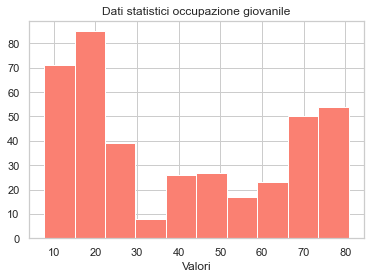

In [21]:
seaborn.set_style(style="whitegrid")
seaborn.set_palette(palette="dark:salmon_r")
plt.hist(Datistat)
plt.title('Dati statistici occupazione giovanile') #titolo del grafico
plt.xlabel('Valori') #nome asse x

**COMMENTO GRAFICO**: *Il grafico sopra riportato mostra l'andamento dell'occupazione giovanile (presi i valori totali) distribuita nei diversi anni (dal 2010 al 2019); come si può notare c'è stata un'alta occupazione negli anni 2010 e 2011 e poi è andata calando fino ad avere una leggera ripresa nel 2018 e 2019*

In [22]:
sns.set_theme(style="darkgrid")

<Figure size 720x144 with 0 Axes>

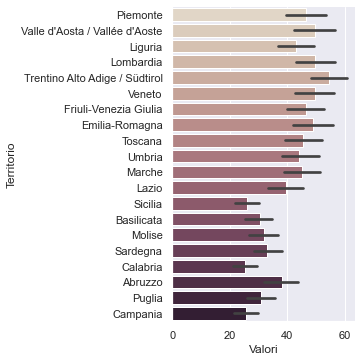

In [23]:
fig = plt.figure(figsize=(10,2))
sns.catplot(data=primo_data, x="Valori", y="Territorio", kind="bar", palette="ch:.25")

**COMMENTO GRAFICO**:
*Il grafico rappresenta in generale l'occupazione per regione; ad esempio il Trentino Alto Adige, la Valle d'Aosta, il Veneto e la Lombardia presentano i valori di occupazione a livello giovanile più alti mentre regioni come la Sicilia hanno un occupazione giovanile nettamente inferiore (in fondo al nostro lavoro abbiamo sviluppato un'analisi in merito a tale regione)*

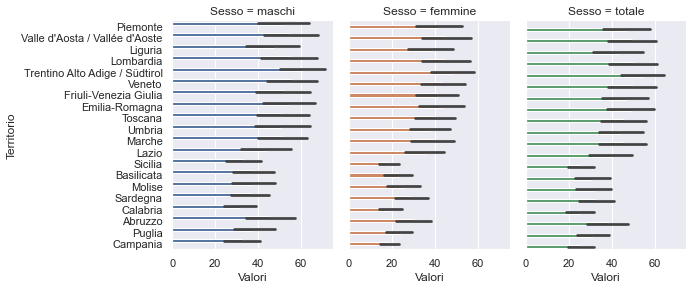

In [24]:
sns.catplot(data=primo_data, x="Valori", y="Territorio", hue="Sesso", col="Sesso",kind="bar",height=4, aspect=.8)

**COMMENTO GRAFICO**:
*Questo grafico è più dettagliato rispetto al precedente poichè analizza l'occupazione in funzione del sesso*

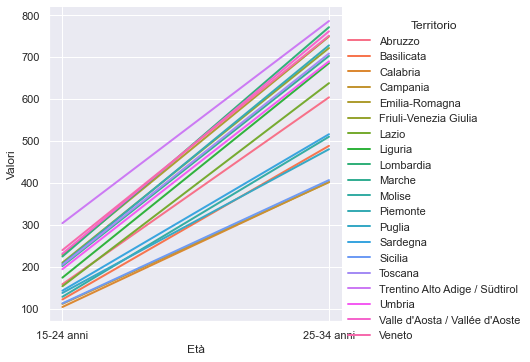

In [25]:
sns.color_palette()
sns.relplot(data=provapdef, x="Età", y="Valori", kind="line", hue="Territorio", size="Territorio",sizes=(2,2)) #oppure kind="scatter"
plt.show()

**COMMENTO GRAFICO**:
*Il grafico rappresenta l'occupazione per regione dividendo le due classi di età 15-24 e 25-34. Come si evince, la seconda classe di età presenta valori occupazionali di gran lunga maggiori rispetto alla classe di età inferiore pertanto, in conclusione, possiamo dire che con l'aumento dell'età è proporzionale all'aumento dell'occupazione*

***

#### Importiamo il Dataset "tasso scolarità" dei giovani tra i 15 - 34 anni divisi per titolo di studio (lo si trova sempre sul sito di Giovanistat) al fine di far emergere gli scostamenti per anno e per sesso dei tassi di titoli di studio

In [28]:
tasso_scolarità = pd.read_csv("C:/Users/utente/Desktop/UNIMI/Tasso scolarità.csv")
tasso_scolarità 

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TITOLO_STUDIO,Titolo di studio,CITTADINANZA,Cittadinanza,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010,2010,57.725,NaN,NaN
1,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q2,T2-2010,70.229,NaN,NaN
2,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q1,T1-2010,75.314,NaN,NaN
3,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q4,T4-2010,44.196,NaN,NaN
4,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q3,T3-2010,41.161,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q2,T2-2019,6542.816,NaN,NaN
1304,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q4,T4-2019,6507.638,NaN,NaN
1305,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q3,T3-2019,6519.996,NaN,NaN
1306,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2020-Q2,T2-2020,6472.912,NaN,NaN


In [29]:
tasso_scolarità.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TITOLO_STUDIO           0
Titolo di studio        0
CITTADINANZA            0
Cittadinanza            0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1308
Flags                1308
dtype: int64

**Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**



In [30]:
#ts = tasso di scolarità
ts= pd.DataFrame(data=tasso_scolarità, columns =['Territorio', 'Sesso', 'Classe di età', 'Titolo di studio','Seleziona periodo', 'Value' ])
ts

,Territorio,Sesso,Classe di età,Titolo di studio,Seleziona periodo,Value
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


In [31]:
ts.rename(columns={"Seleziona periodo": "Periodo", "Value": "Valori", "Classe di età" : "Età"},inplace=True) 
ts

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


Nella colonna "Periodo" ci sono dei valori contenenti la lettera T che però non ci interessano per la nostra analisi pertanto li togliamo

In [32]:
ts=ts[~ts.Periodo.str.contains("T")]
ts

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
5,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,52.413
10,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,56.919
15,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,51.859
20,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,45.993
...,...,...,...,...,...,...
1281,Italia,totale,25-34 anni,totale,2015,6837.353
1286,Italia,totale,25-34 anni,totale,2016,6760.848
1291,Italia,totale,25-34 anni,totale,2017,6677.184
1296,Italia,totale,25-34 anni,totale,2018,6607.820


In [33]:
ts1=ts.groupby(["Sesso", "Età", "Titolo di studio","Periodo","Valori"]).sum()
ts1

Territorio
Sesso   Età        Titolo di studio Periodo Valori             
femmine 15-24 anni diploma          2010    1294.455     Italia
                                    2011    1305.399     Italia
                                    2012    1318.735     Italia
                                    2013    1328.669     Italia
                                    2014    1311.619     Italia
...                                                         ...
totale  25-34 anni totale           2015    6837.353     Italia
                                    2016    6760.848     Italia
                                    2017    6677.184     Italia
                                    2018    6607.820     Italia
                                    2019    6532.872     Italia

[300 rows x 1 columns]


**La tabella non ci evidenzia il sesso maschile ma in realtà i valori ci sono (vedi sotto):**

In [34]:
ts2=ts1.groupby(["Sesso"]).count().reset_index()
ts2["Sesso"]

0    femmine
1     maschi
2     totale
Name: Sesso, dtype: object

In [35]:
ts2=ts.groupby(["Titolo di studio"]).sum()
ts2

,Valori
Titolo di studio,
diploma,119550.989
laurea e post-laurea,38336.361
"licenza di scuola elementare, nessun titolo di studio",4933.258
licenza di scuola media,94224.796
totale,257045.401


**Creiamo un primo grafico a torta contenente i vari titoli di studio**

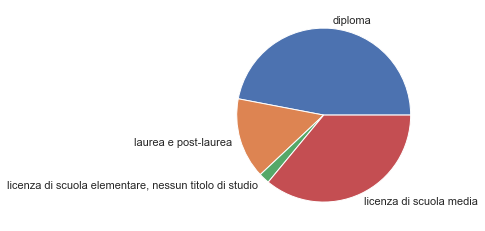

In [36]:
#x = np.array([119550.989, 38336.361, 4933.258, 94224.796])
fracs = [47, 15, 2, 36]
label = ["diploma", "laurea e post-laurea", "licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media"]
plt.pie(fracs, labels=label)
plt.show()

In [37]:
ts3=ts.groupby(["Titolo di studio", "Periodo"]).sum()
ts3

Valori
Titolo di studio                                   Periodo           
diploma                                            2010     12554.662
                                                   2011     12420.473
                                                   2012     12231.868
                                                   2013     12200.951
                                                   2014     12084.105
                                                   2015     11904.191
                                                   2016     11684.760
                                                   2017     11581.684
                                                   2018     11427.278
                                                   2019     11461.017
laurea e post-laurea                               2010      3466.648
                                                   2011      3444.130
                                                   2012      3605.293
                                                   2013      3649.452
                                                   2014      3827.076
                                                   2015      3892.945
                                                   2016      3933.137
                                                   2017      4094.818
                                                   2018      4210.588
                                                   2019      4212.274
licenza di scuola elementare, nessun titolo di ... 2010       647.097
                                                   2011       605.606
                                                   2012       577.934
                                                   2013       563.692
                                                   2014       509.874
                                                   2015       453.811
                                                   2016       434.404
                                                   2017       399.166
                                                   2018       383.606
                                                   2019       358.068
licenza di scuola media                            2010     10213.548
                                                   2011     10017.553
                                                   2012      9770.602
                                                   2013      9570.808
                                                   2014      9348.418
                                                   2015      9297.077
                                                   2016      9276.608
                                                   2017      9035.421
                                                   2018      8917.788
                                                   2019      8776.973
totale                                             2010     26881.956
                                                   2011     26487.762
                                                   2012     26185.697
                                                   2013     25984.904
                                                   2014     25769.474
                                                   2015     25548.020
                                                   2016     25328.911
                                                   2017     25111.089
                                                   2018     24939.260
                                                   2019     24808.328

**Creiamo un grafico a torta per ciascun anno suddiviso per titolo di studio, in modo da poter vedere in modo chiaro e lineare l'andamento del tasso di scolarità nel decennio 2010-2020**

**Estraiamo innanzitutto dal dataset "ts" l'anno su cui ci concentriamo per elaborare i dati. Una volta ottenuti i dati di un certo anno, cambiamo la funzione immettendo l'anno successivo di riferimento**

In [38]:
prova=ts[ts.Periodo.str.contains("2015")]
prova

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
25,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2015,45.150
77,Italia,maschi,15-24 anni,licenza di scuola media,2015,1615.602
109,Italia,maschi,15-24 anni,diploma,2015,1308.115
139,Italia,maschi,15-24 anni,laurea e post-laurea,2015,82.782
191,Italia,maschi,15-24 anni,totale,2015,3051.648
243,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2015,32.814
295,Italia,femmine,15-24 anni,licenza di scuola media,2015,1399.327
327,Italia,femmine,15-24 anni,diploma,2015,1308.040
357,Italia,femmine,15-24 anni,laurea e post-laurea,2015,144.829
409,Italia,femmine,15-24 anni,totale,2015,2885.009


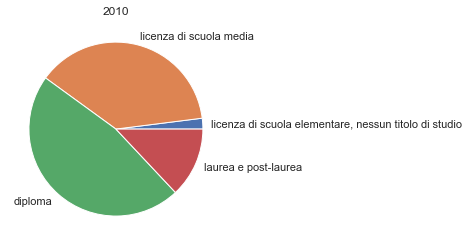

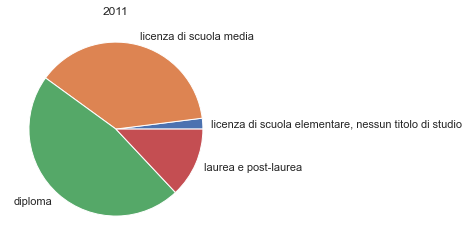

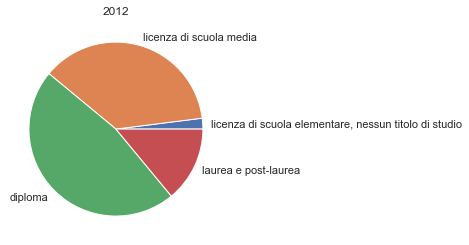

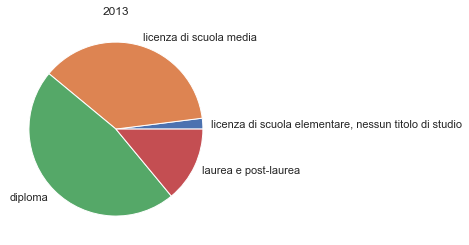

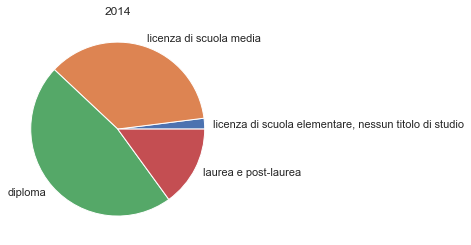

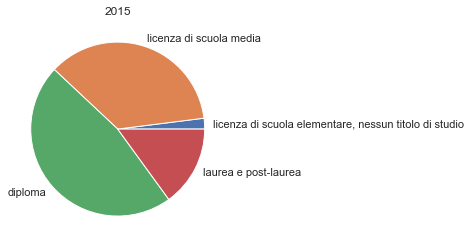

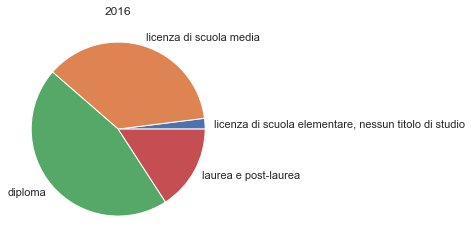

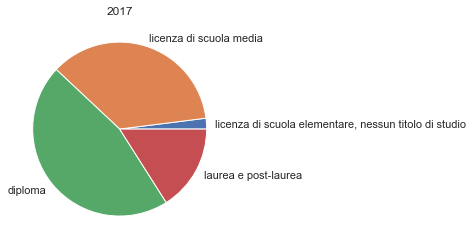

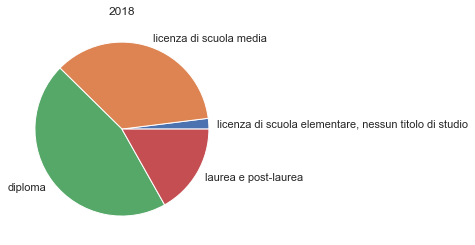

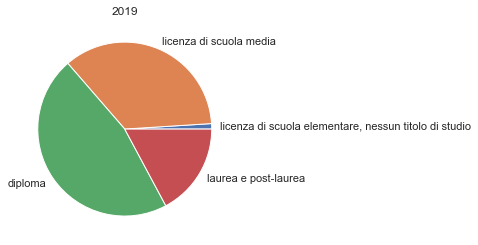

In [39]:
#anno 2010 --> x = np.array([323.549, 5.106.774, 6.277.331, 1.733.324])
fracs = [2, 38, 47, 13]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2010') #titolo del grafico
plt.show()

#anno 2011 --> x = np.array([302.803, 5.008.777, 6.210.236, 1.722.065])
fracs = [2, 38, 47, 13]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2011') #titolo del grafico
plt.show()

#anno 2012 --> x = np.array([288.967, 4.885.301, 6.115.934, 1.802.647])
fracs = [2, 37, 47, 14]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2012') #titolo del grafico
plt.show()

#anno 2013 --> x = np.array([281.846, 4.785.404, 6.100.475, 1.824.726])
fracs = [2, 37, 47, 14]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2013') #titolo del grafico
plt.show()

#anno 2014 --> x = np.array([254.937, 4.674.209, 6.042.053, 1.913.538])
fracs = [2, 36, 47, 15]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2014') #titolo del grafico
plt.show()

#anno 2015 --> x = np.array([226.906, 4.648.539, 5.952.096, 1.946.473])
fracs = [2, 36, 47, 15]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2015') #titolo del grafico
plt.show()

#anno 2016 --> x = np.array([217.202, 4.638.304, 5.842.380, 1.966.568])
fracs = [2, 37, 46, 16]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2016') #titolo del grafico
plt.show()

#anno 2017 --> x = np.array([206.404, 4.557.317, 5.840.044, 2.002.046])
fracs = [2, 36, 46, 16]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2017') #titolo del grafico
plt.show()

#anno 2018 --> x = np.array([191.803, 4.458.894, 5.713.639, 2.105.294])
fracs = [2, 36, 46, 17]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2018') #titolo del grafico
plt.show()

#anno 2019 --> x = np.array([179.035, 4.388.487, 5.730.509, 2.106.137])
fracs = [1, 35, 46, 17]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2019') #titolo del grafico
plt.show()

**Ci siamo accorte che le percentuali dei vari titoli di studio variano in minima misura di anno in anno. Si decide, pertanto, di procedere analizzando lo scostamento del tasso di scolarità tra maschi e femmine**

Partiamo continuando ad utilizzare i grafici a torta

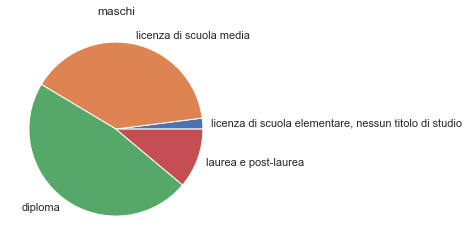

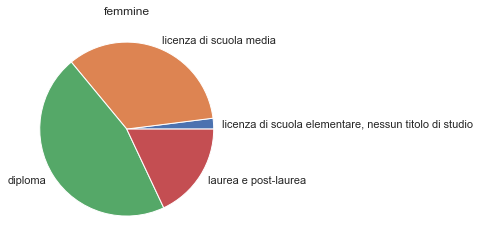

In [40]:
#2010-2019 maschi --> x = np.array([1.375.948, 25.728.611, 30.761.978, 7.429.871])
fracs = [2, 39, 47, 11]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('maschi') #titolo del grafico
plt.show()

#2010-2019 femmine --> x = np.array([1.097.504, 21.423.395, 29.062.719, 11.692.947])
fracs = [2, 34, 46, 18]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('femmine') #titolo del grafico
plt.show()

*Mostriamo ora come si può arrivare ai grafici sopra creando dei dataset appositi*

Filtriamo il dataset solo per Sesso > **Maschi**

In [41]:
prova1=ts[ts.Sesso.str.contains("maschi")]
prova1

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
5,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,52.413
10,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,56.919
15,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,51.859
20,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,45.993
...,...,...,...,...,...,...
845,Italia,maschi,25-34 anni,totale,2015,3436.788
850,Italia,maschi,25-34 anni,totale,2016,3404.920
855,Italia,maschi,25-34 anni,totale,2017,3371.524
860,Italia,maschi,25-34 anni,totale,2018,3346.635


Selezioniamo solo le colonne che mi interessano

In [42]:
maschi_totale = pd.DataFrame(data=prova1, columns =['Sesso', 'Titolo di studio', 'Valori' ])
maschi_totale

,Sesso,Titolo di studio,Valori
0,maschi,"licenza di scuola elementare, nessun titolo di...",57.725
5,maschi,"licenza di scuola elementare, nessun titolo di...",52.413
10,maschi,"licenza di scuola elementare, nessun titolo di...",56.919
15,maschi,"licenza di scuola elementare, nessun titolo di...",51.859
20,maschi,"licenza di scuola elementare, nessun titolo di...",45.993
...,...,...,...
845,maschi,totale,3436.788
850,maschi,totale,3404.920
855,maschi,totale,3371.524
860,maschi,totale,3346.635


Filtriamo il dataset solo per Sesso > **Femmine**

In [43]:
prova2=ts[ts.Sesso.str.contains("femmine")]
prova2

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
218,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,43.039
223,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,39.858
228,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,41.653
233,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,36.446
238,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,31.296
...,...,...,...,...,...,...
1063,Italia,femmine,25-34 anni,totale,2015,3400.565
1068,Italia,femmine,25-34 anni,totale,2016,3355.927
1073,Italia,femmine,25-34 anni,totale,2017,3305.659
1078,Italia,femmine,25-34 anni,totale,2018,3261.184


Selezioniamo solo le colonne che mi interessano

In [44]:
femmine_totale = pd.DataFrame(data=prova2, columns =['Sesso', 'Titolo di studio', 'Valori' ])
femmine_totale

,Sesso,Titolo di studio,Valori
218,femmine,"licenza di scuola elementare, nessun titolo di...",43.039
223,femmine,"licenza di scuola elementare, nessun titolo di...",39.858
228,femmine,"licenza di scuola elementare, nessun titolo di...",41.653
233,femmine,"licenza di scuola elementare, nessun titolo di...",36.446
238,femmine,"licenza di scuola elementare, nessun titolo di...",31.296
...,...,...,...
1063,femmine,totale,3400.565
1068,femmine,totale,3355.927
1073,femmine,totale,3305.659
1078,femmine,totale,3261.184


Mostriamo in modo più ordinato il dataset dei *maschi* e delle *femmine*

In [45]:
prova3=prova1.groupby(["Titolo di studio","Sesso" ]).sum()
prova3

,,Valori
Titolo di studio,Sesso,
diploma,maschi,30761.978
laurea e post-laurea,maschi,7429.871
"licenza di scuola elementare, nessun titolo di studio",maschi,1375.948
licenza di scuola media,maschi,25728.611
totale,maschi,65296.402


In [46]:
prova4=prova2.groupby(["Titolo di studio","Sesso" ]).sum()
prova4

,,Valori
Titolo di studio,Sesso,
diploma,femmine,29013.517
laurea e post-laurea,femmine,11738.310
"licenza di scuola elementare, nessun titolo di studio",femmine,1090.683
licenza di scuola media,femmine,21383.788
totale,femmine,63226.298


***Uniamo i dataset dei maschi e delle femmine in un unico dataset, in modo da poterlo utilizzare al fine di creare un grafico più ordinato***

In [47]:
totale_ts=pd.merge(left=maschi_totale, right=femmine_totale, how='outer',on=("Valori", "Titolo di studio", "Sesso"))
totale_ts

,Sesso,Titolo di studio,Valori
0,maschi,"licenza di scuola elementare, nessun titolo di...",57.725
1,maschi,"licenza di scuola elementare, nessun titolo di...",52.413
2,maschi,"licenza di scuola elementare, nessun titolo di...",56.919
3,maschi,"licenza di scuola elementare, nessun titolo di...",51.859
4,maschi,"licenza di scuola elementare, nessun titolo di...",45.993
...,...,...,...
195,femmine,totale,3400.565
196,femmine,totale,3355.927
197,femmine,totale,3305.659
198,femmine,totale,3261.184


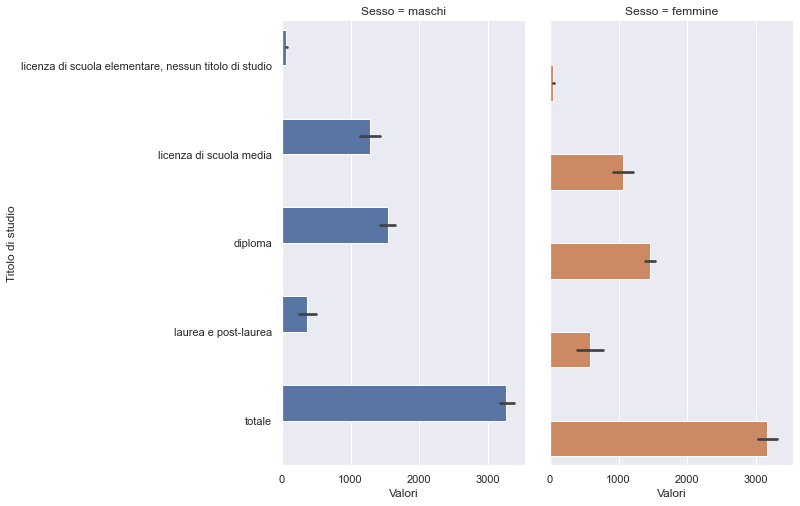

In [48]:
sns.color_palette()
sns.catplot(data=totale_ts, x="Valori", y="Titolo di studio", hue="Sesso", col="Sesso",kind="bar",height=7, aspect=.8)

**COMMENTO GRAFICO:**

**Come si può notare dal grafico sopra, vi sono delle differenze tra i valori dei titoli di studio tra maschi e femmine.**

**Ad esempio:**

- **licenza di scuola elementare, nessun titolo di studio:** *maschi > femmine*
- **licenza di scuola media:** *maschi > femmine*
- **diploma:** *maschi > femmine*
- **laurea:** *maschi < femmine*

*** 

#### Ora continuiamo la nostra analisi importando un ulteriore dataset in cui vengono evidenziati i tassi di disoccupazione giovanile per poterli confrontare con quelli di occupazione

In [49]:
tabella_iniziale_disoc= pd.read_csv("C:/Users/utente/Desktop/UNIMI/tasso disoccupazione.csv")
tabella_iniziale_disoc

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2010,2010,26.669293,NaN,NaN
1,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2011,2011,23.777270,NaN,NaN
2,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2012,2012,29.870147,NaN,NaN
3,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2013,2013,40.233077,NaN,NaN
4,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2014,2014,41.636268,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2015,2015,36.901490,NaN,NaN
1316,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2016,2016,37.043544,NaN,NaN
1317,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2017,2017,27.681294,NaN,NaN
1318,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2018,2018,28.532478,NaN,NaN


In [50]:
tabella_iniziale_disoc.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1320
Flags                1320
dtype: int64

**Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**

In [51]:
tasso_disoccupazione_giovanile= pd.DataFrame(data=tabella_iniziale_disoc, columns =['Territorio', 'SEXISTAT1', 'Sesso', 'Classe di età', 'Seleziona periodo', 'Value' ])
tasso_disoccupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Value
0,Piemonte,1,maschi,15-24 anni,2010,26.669293
1,Piemonte,1,maschi,15-24 anni,2011,23.777270
2,Piemonte,1,maschi,15-24 anni,2012,29.870147
3,Piemonte,1,maschi,15-24 anni,2013,40.233077
4,Piemonte,1,maschi,15-24 anni,2014,41.636268
...,...,...,...,...,...,...
1315,Marche,2,femmine,15-24 anni,2015,36.901490
1316,Marche,2,femmine,15-24 anni,2016,37.043544
1317,Marche,2,femmine,15-24 anni,2017,27.681294
1318,Marche,2,femmine,15-24 anni,2018,28.532478


In [52]:
tasso_disoccupazione_giovanile.rename(columns={"Value": "Valori", "Seleziona periodo":"Anni", "Classe di età":"Età"},inplace=True) 

In [53]:
tasso_disoccupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.669293
1,Piemonte,1,maschi,15-24 anni,2011,23.777270
2,Piemonte,1,maschi,15-24 anni,2012,29.870147
3,Piemonte,1,maschi,15-24 anni,2013,40.233077
4,Piemonte,1,maschi,15-24 anni,2014,41.636268
...,...,...,...,...,...,...
1315,Marche,2,femmine,15-24 anni,2015,36.901490
1316,Marche,2,femmine,15-24 anni,2016,37.043544
1317,Marche,2,femmine,15-24 anni,2017,27.681294
1318,Marche,2,femmine,15-24 anni,2018,28.532478


In [54]:
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.830675
1,Piemonte,1,maschi,15-24 anni,2011,27.706425
2,Piemonte,1,maschi,15-24 anni,2012,26.633891
3,Piemonte,1,maschi,15-24 anni,2013,21.571089
4,Piemonte,1,maschi,15-24 anni,2014,20.204679
...,...,...,...,...,...,...
1315,Puglia,2,femmine,15-24 anni,2015,8.627377
1316,Puglia,2,femmine,15-24 anni,2016,10.193790
1317,Puglia,2,femmine,15-24 anni,2017,10.633209
1318,Puglia,2,femmine,15-24 anni,2018,11.432762


In [55]:
#TDG=tasso disoccupazione giovanile
TDG_regioni=tasso_disoccupazione_giovanile[~tasso_disoccupazione_giovanile.Territorio.str.contains("Provincia")]
TDG_regioni

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.669293
1,Piemonte,1,maschi,15-24 anni,2011,23.777270
2,Piemonte,1,maschi,15-24 anni,2012,29.870147
3,Piemonte,1,maschi,15-24 anni,2013,40.233077
4,Piemonte,1,maschi,15-24 anni,2014,41.636268
...,...,...,...,...,...,...
1315,Marche,2,femmine,15-24 anni,2015,36.901490
1316,Marche,2,femmine,15-24 anni,2016,37.043544
1317,Marche,2,femmine,15-24 anni,2017,27.681294
1318,Marche,2,femmine,15-24 anni,2018,28.532478


In [56]:
primo_data_disoc=TDG_regioni[['Territorio','Sesso','Valori','Età']]
primo_data_disoc

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,26.669293,15-24 anni
1,Piemonte,maschi,23.777270,15-24 anni
2,Piemonte,maschi,29.870147,15-24 anni
3,Piemonte,maschi,40.233077,15-24 anni
4,Piemonte,maschi,41.636268,15-24 anni
...,...,...,...,...
1315,Marche,femmine,36.901490,15-24 anni
1316,Marche,femmine,37.043544,15-24 anni
1317,Marche,femmine,27.681294,15-24 anni
1318,Marche,femmine,28.532478,15-24 anni


In [57]:
#disoccupazione totale
totale2=primo_data_disoc[primo_data_disoc.Sesso == "totale"]
totale2

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,26.645422,15-24 anni
21,Piemonte,totale,24.973022,15-24 anni
22,Piemonte,totale,32.079402,15-24 anni
23,Piemonte,totale,40.640527,15-24 anni
24,Piemonte,totale,42.233026,15-24 anni
...,...,...,...,...
1295,Calabria,totale,36.225437,25-34 anni
1296,Calabria,totale,38.808266,25-34 anni
1297,Calabria,totale,34.371335,25-34 anni
1298,Calabria,totale,29.761071,25-34 anni


In [58]:
#occupazione totale
totale=primo_data[primo_data.Sesso == "totale"]
totale

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,24.321255,15-24 anni
21,Piemonte,totale,24.479800,15-24 anni
22,Piemonte,totale,23.196776,15-24 anni
23,Piemonte,totale,18.593086,15-24 anni
24,Piemonte,totale,18.210225,15-24 anni
...,...,...,...,...
1275,Sicilia,totale,39.700859,25-34 anni
1276,Sicilia,totale,40.051565,25-34 anni
1277,Sicilia,totale,39.675758,25-34 anni
1278,Sicilia,totale,38.756915,25-34 anni


In [59]:
provadef_occ=pd.DataFrame(data=totale, columns =['Territorio', 'Valori'])
provadef_occ

,Territorio,Valori
20,Piemonte,24.321255
21,Piemonte,24.479800
22,Piemonte,23.196776
23,Piemonte,18.593086
24,Piemonte,18.210225
...,...,...
1275,Sicilia,39.700859
1276,Sicilia,40.051565
1277,Sicilia,39.675758
1278,Sicilia,38.756915


In [60]:
provadef_disocc=pd.DataFrame(data=totale2, columns =['Territorio', 'Valori'])
provadef_disocc

,Territorio,Valori
20,Piemonte,26.645422
21,Piemonte,24.973022
22,Piemonte,32.079402
23,Piemonte,40.640527
24,Piemonte,42.233026
...,...,...
1295,Calabria,36.225437
1296,Calabria,38.808266
1297,Calabria,34.371335
1298,Calabria,29.761071


In [65]:
unione_dataset=pd.merge(left=provadef_occ, right=provadef_disocc, how='outer',on=("Territorio", "Valori"))
unione_dataset

,Territorio,Valori
0,Piemonte,24.321255
1,Piemonte,24.479800
2,Piemonte,23.196776
3,Piemonte,18.593086
4,Piemonte,18.210225
...,...,...
795,Calabria,36.225437
796,Calabria,38.808266
797,Calabria,34.371335
798,Calabria,29.761071


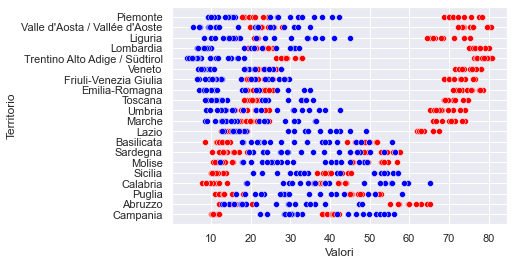

In [66]:
sns.scatterplot(x="Valori", y="Territorio", data=provadef_occ, color="red");
sns.scatterplot(x="Valori", y="Territorio", data=provadef_disocc, color="blue");
plt.show()

# NON RIUSCIAMO A RAPPRESENTARE I TASSI DI OCCUPAZIONE E DISOCCUPAZIONE IN UN UNICO GRAFICO, CI PUO' GENTILMENTE AIUTARE? GRAZIE MILLE

#### Come ultima analisi, più approfondita, abbiamo deciso di considerare l'occupazione e la disoccupazione giovanile nella regione Sicilia nell'anno più recente quindi 2019 confrontando i dati con un articolo di giornale molto interessante: https://palermo.repubblica.it/cronaca/2019/07/06/news/sicilia_cresce_la_disoccupazione_da_23_anni_mai_cosi_pochi_al_lavoro-230478842/

In [108]:
#prendiamo il dataset dell'occupazione giovanile "TOG_regioni" e selezioniamo solo le colonne che ci interessano 

In [67]:
Regioni_occ=pd.DataFrame(data=TOG_regioni, columns =['Territorio', 'Valori', 'Sesso', 'Anni', 'Età'])
Regioni_occ                  

,Territorio,Valori,Sesso,Anni,Età
0,Piemonte,26.830675,maschi,2010,15-24 anni
1,Piemonte,27.706425,maschi,2011,15-24 anni
2,Piemonte,26.633891,maschi,2012,15-24 anni
3,Piemonte,21.571089,maschi,2013,15-24 anni
4,Piemonte,20.204679,maschi,2014,15-24 anni
...,...,...,...,...,...
1315,Puglia,8.627377,femmine,2015,15-24 anni
1316,Puglia,10.193790,femmine,2016,15-24 anni
1317,Puglia,10.633209,femmine,2017,15-24 anni
1318,Puglia,11.432762,femmine,2018,15-24 anni


In [68]:
valori_totali_occ=Regioni_occ[Regioni_occ.Sesso.str.contains("totale")]
valori_totali_occ

,Territorio,Valori,Sesso,Anni,Età
20,Piemonte,24.321255,totale,2010,15-24 anni
21,Piemonte,24.479800,totale,2011,15-24 anni
22,Piemonte,23.196776,totale,2012,15-24 anni
23,Piemonte,18.593086,totale,2013,15-24 anni
24,Piemonte,18.210225,totale,2014,15-24 anni
...,...,...,...,...,...
1275,Sicilia,39.700859,totale,2015,25-34 anni
1276,Sicilia,40.051565,totale,2016,25-34 anni
1277,Sicilia,39.675758,totale,2017,25-34 anni
1278,Sicilia,38.756915,totale,2018,25-34 anni


In [69]:
Occ_Sicilia=valori_totali_occ[valori_totali_occ.Territorio.str.contains("Sicilia")]
Occ_Sicilia

,Territorio,Valori,Sesso,Anni,Età
1020,Sicilia,13.849535,totale,2010,15-24 anni
1021,Sicilia,13.094145,totale,2011,15-24 anni
1022,Sicilia,11.819366,totale,2012,15-24 anni
1023,Sicilia,10.515809,totale,2013,15-24 anni
1024,Sicilia,10.159642,totale,2014,15-24 anni
1025,Sicilia,10.795367,totale,2015,15-24 anni
1026,Sicilia,10.877264,totale,2016,15-24 anni
1027,Sicilia,11.204803,totale,2017,15-24 anni
1028,Sicilia,10.001886,totale,2018,15-24 anni
1029,Sicilia,10.378012,totale,2019,15-24 anni


In [70]:
Occ_Sicilia_2019=Occ_Sicilia[Occ_Sicilia['Anni']==(2019)]
Occ_Sicilia_2019

,Territorio,Valori,Sesso,Anni,Età
1029,Sicilia,10.378012,totale,2019,15-24 anni
1279,Sicilia,40.300443,totale,2019,25-34 anni


**Sommando i due valori, In Sicilia, nel 2019, il numero di occupati si aggirava intorno ai 50.678125**

In [195]:
#ora facciamo la stessa cosa dal lato della disoccupazione prendendo  il dataset "TDG_regioni" e selezioniamo solo le colonne che ci interessano 

In [71]:
Regioni_disocc=pd.DataFrame(data=TDG_regioni, columns =['Territorio', 'Valori', 'Sesso', 'Anni', 'Età'])
Regioni_disocc

,Territorio,Valori,Sesso,Anni,Età
0,Piemonte,26.669293,maschi,2010,15-24 anni
1,Piemonte,23.777270,maschi,2011,15-24 anni
2,Piemonte,29.870147,maschi,2012,15-24 anni
3,Piemonte,40.233077,maschi,2013,15-24 anni
4,Piemonte,41.636268,maschi,2014,15-24 anni
...,...,...,...,...,...
1315,Marche,36.901490,femmine,2015,15-24 anni
1316,Marche,37.043544,femmine,2016,15-24 anni
1317,Marche,27.681294,femmine,2017,15-24 anni
1318,Marche,28.532478,femmine,2018,15-24 anni


In [72]:
valori_totali_disocc=Regioni_disocc[Regioni_disocc.Sesso.str.contains("totale")]
valori_totali_disocc

,Territorio,Valori,Sesso,Anni,Età
20,Piemonte,26.645422,totale,2010,15-24 anni
21,Piemonte,24.973022,totale,2011,15-24 anni
22,Piemonte,32.079402,totale,2012,15-24 anni
23,Piemonte,40.640527,totale,2013,15-24 anni
24,Piemonte,42.233026,totale,2014,15-24 anni
...,...,...,...,...,...
1295,Calabria,36.225437,totale,2015,25-34 anni
1296,Calabria,38.808266,totale,2016,25-34 anni
1297,Calabria,34.371335,totale,2017,25-34 anni
1298,Calabria,29.761071,totale,2018,25-34 anni


In [73]:
Disocc_Sicilia=valori_totali_disocc[valori_totali_disocc.Territorio.str.contains("Sicilia")]
Disocc_Sicilia

,Territorio,Valori,Sesso,Anni,Età
1110,Sicilia,22.838953,totale,2010,25-34 anni
1111,Sicilia,20.683666,totale,2011,25-34 anni
1112,Sicilia,26.728674,totale,2012,25-34 anni
1113,Sicilia,32.808438,totale,2013,25-34 anni
1114,Sicilia,34.431638,totale,2014,25-34 anni
1115,Sicilia,32.301093,totale,2015,25-34 anni
1116,Sicilia,31.396140,totale,2016,25-34 anni
1117,Sicilia,32.488043,totale,2017,25-34 anni
1118,Sicilia,33.358406,totale,2018,25-34 anni
1119,Sicilia,30.008006,totale,2019,25-34 anni


In [74]:
Disocc_Sicilia_2019=Disocc_Sicilia[Disocc_Sicilia['Anni']==(2019)]
Disocc_Sicilia_2019

,Territorio,Valori,Sesso,Anni,Età
1119,Sicilia,30.008006,totale,2019,25-34 anni
1279,Sicilia,51.081511,totale,2019,15-24 anni


**Sommando i due valori, in Sicilia, nel 2019, il numero di disoccupati si aggirava intorno ai 81.089517**

#### ***Come si evince dall'analisi, il numero dei giovani disoccupati nella regione Sicilia nell'anno 2019 (81.089517) è superiore rispetto al numero degli occupati nello stesso anno (50.678125) e ciò è confermato anche dall'articolo di giornale sopra indicato: La Sicilia "non è una regione per giovani"; elemento rilevante è inoltre la disoccupazione del sesso femminile (circa 48,2%). Questo denota dunche che in Italia, c'è una grande differenza di occupazione e disoccupazione tra le diverse regioni e la Sicilia è una tra le regioni in cui si hanno elevanti tassi di disoccupazione soprattutto tra il genere femminile che trova difficoltà ad inserirsi nel mercato del lavoro.***